Epoch [1/10], Loss: 0.0844
Epoch [2/10], Loss: 0.0755
Epoch [3/10], Loss: 0.0666
Epoch [4/10], Loss: 0.0664
Epoch [5/10], Loss: 0.0677
Epoch [6/10], Loss: 0.0653
Epoch [7/10], Loss: 0.0679
Epoch [8/10], Loss: 0.0635
Epoch [9/10], Loss: 0.0706
Epoch [10/10], Loss: 0.0634
Test Loss: 0.0647


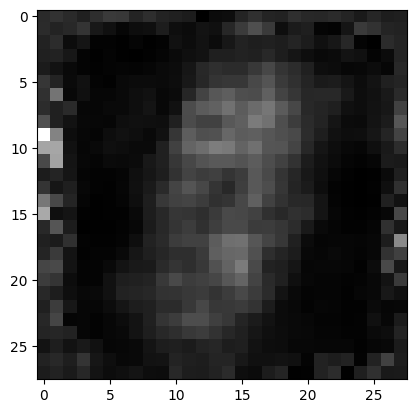

In [2]:
# Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Load and Preprocess the Data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the Model Architecture
class AutoregressiveModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(AutoregressiveModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Ensure outputs are between 0 and 1
        return x

input_dim = 784  # 28x28 images flattened
hidden_dim = 256
output_dim = 784

model = AutoregressiveModel(input_dim, hidden_dim, output_dim)

# Define the Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the Model
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for images, _ in train_loader:
        images = (images.view(-1, 784) + 1) / 2  # Flatten and transform to [0, 1]

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, images)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the Model
model.eval()
with torch.no_grad():
    test_loss = 0
    for images, _ in test_loader:
        images = (images.view(-1, 784) + 1) / 2  # Flatten and transform to [0, 1]
        outputs = model(images)
        loss = criterion(outputs, images)
        test_loss += loss.item()

    print(f'Test Loss: {test_loss / len(test_loader):.4f}')

# Generate Samples
def generate_image(model):
    model.eval()
    with torch.no_grad():
        generated_image = torch.zeros(1, 784)  # Start with a blank image
        for i in range(784):
            output = model(generated_image)
            generated_image[0, i] = output[0, i]
    generated_image = generated_image.view(28, 28).numpy()
    plt.imshow(generated_image, cmap='gray')
    plt.show()

generate_image(model)
